# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 0. Download and unpack necessary files

In [1]:
#!curl https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip --output Banana.zip # Linux
!curl https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip --output Banana.zip # MacOS
#!curl https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86.zip --output Banana.zip # Win32
#!curl https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip --output Banana.zip # Win64
!unzip Banana.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.7M  100 22.7M    0     0  1398k      0  0:00:16  0:00:16 --:--:-- 1603k
Archive:  Banana.zip
   creating: Banana.app/
   creating: Banana.app/Contents/
   creating: Banana.app/Contents/MacOS/
  inflating: Banana.app/Contents/MacOS/mac_banana  
   creating: Banana.app/Contents/Plugins/
  inflating: Banana.app/Contents/Plugins/libgrpc_csharp_ext.x64.bundle  
   creating: Banana.app/Contents/Resources/
   creating: Banana.app/Contents/Resources/KeyConfig.nib/
  inflating: Banana.app/Contents/Resources/KeyConfig.nib/classes.nib  
  inflating: Banana.app/Contents/Resources/KeyConfig.nib/info.nib  
  inflating: Banana.app/Contents/Resources/KeyConfig.nib/keyedobjects.nib  
  inflating: Banana.app/Contents/Resources/DefaultPreferences.plist  
  inflating: Banana.app/Contents/Resources/Ageia.tif  
  inflating: Banana.app/Contents/R

  inflating: Banana.app/Contents/Resources/Data/Managed/System.Xml.dll  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.WindModule.dll  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.UnityAnalyticsModule.xml  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.ScreenCaptureModule.dll  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.ClusterRendererModule.dll  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.UnityWebRequestModule.dll  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.UnityWebRequestWWWModule.xml  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.ARModule.xml  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.Networking.dll  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.AccessibilityModule.xml  
  inflating: Banana.app/Contents/Resources/Data/Managed/UnityEngine.UnityWebRequestAudioModule.dll  

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [9]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from dqn_agent import Agent
from unityagents import UnityEnvironment
%matplotlib inline

INFO:matplotlib.font_manager:Could not open font file /Library/Fonts/NISC18030.ttf: In FT2Font: Could not set the fontsize
INFO:matplotlib.font_manager:Could not open font file /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize
INFO:matplotlib.font_manager:generated new fontManager


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:

In [ ]:
env_info = env.reset(train_mode=True)[brain_name]

Let's create an agent with an already defined size of the state and action space. The seed is specified to improve reproducibility.

The agent is a double deep Q network taking advantage of replay buffer. The size of the buffer is 10^5 to allow for reach exploration of previous experiences. The batch size if set to 64 which is large to learn from previous experiences but not to overgeneralize across all of them.

At each step, the agent adds a new experience to the memory and every 4 steps it samples a batch of recent experiences to learn. It might be advantageous to increase this parameter, especially for the early stages of learning, since the agent does not have enough experience yet to efficient sample.

The default provided for learning rate, soft update, and discount factor(5 * 10^-4, 10^-3, and 0.99) respectively proved to be reasonable for this task. Although decreasing discount factor might be beneficial, since the distribution of bananas across the room seems to be normal, and agents should strive for acquiring nearby bananas even more than going for groups of bananas.

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, seed=42)

Now create DQN training function add execute it

Note about hyperparameters - the default values for epsilon seem to do the job and weren't changed during the training, although decreasing it even faster may lead to the faster convergence to the optimal policy.

In [12]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset environment at the start of the each episode
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps) # choose an action epsilon-greedely
            env_info = env.step(action)[brain_name] # get environment information
            next_state = env_info.vector_observations[0] # next state
            reward = env_info.rewards[0] # reward received by taken specified action 
            done = env_info.local_done[0] # whether the episode is finished
            agent.step(state, action, reward, next_state, done) # add current experience to replay memory
            state = next_state # update current state
            score += reward # update current score
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

Episode 100	Average Score: 0.80
Episode 200	Average Score: 4.23
Episode 300	Average Score: 7.06
Episode 400	Average Score: 10.02
Episode 500	Average Score: 12.62
Episode 600	Average Score: 14.06
Episode 700	Average Score: 14.80
Episode 800	Average Score: 15.63
Episode 900	Average Score: 15.75
Episode 1000	Average Score: 15.26
Episode 1100	Average Score: 15.60
Episode 1200	Average Score: 16.58
Episode 1300	Average Score: 16.68
Episode 1400	Average Score: 16.56
Episode 1500	Average Score: 15.90
Episode 1600	Average Score: 16.13
Episode 1700	Average Score: 16.37
Episode 1800	Average Score: 15.71
Episode 1900	Average Score: 15.68
Episode 2000	Average Score: 15.88


The required average score of 13 was achieved in 600 episodes. 16.5 seems to be the soft cap of the score that the agent can achieve. Oscillation around this point can be explained by the stochastic nature of the environment and/or agents overfitting to specific starting conditions/bananas location.

The plot of average scores can be seen below:

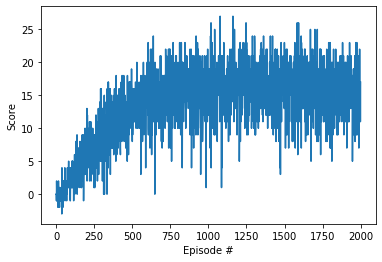

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

The agent was trained using a vanilla DQN architecture with fixes Q targets and experience replay.

To make the algorithm converge faster and/or achieve a higher maximum score additional hyperparameter search might be performed. The current training session for 2000 episodes suggests that the agent does not seems to improve significantly after achieving a 15+ score(around 800 episodes marker). Training from the raw pixels might be another interesting challenge, but for that model should be trained significantly longer.